## Get data

In [225]:
# Only use full for Google colab

#!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip -d data
#!unzip nlp_getting_started.zip -d data
#! python -m spacy download en_core_web_sm  # download english model for spacy

zsh:1: command not found: wget


## Explore Data

In [24]:
import numpy as np
import pandas as pd
df_train = pd.read_csv("../data/nlp_getting_started/train.csv")
df_test = pd.read_csv("../data/nlp_getting_started/test.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
# percentage of samples in training and test set
print(f"Percentage of samples in training set: {len(df_train)/(len(df_train)+len(df_test))*100:.2f}%")
print(f"Percentage of samples in test set: {len(df_test)/(len(df_train)+len(df_test))*100:.2f}%")

Percentage of samples in training set: 70.00%
Percentage of samples in test set: 30.00%


In [27]:
# Shuffle training dataframe
df_train_shuffled = df_train.sample(frac=1, random_state=42)
df_train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [28]:
# unique labels and their counts
print(df_train_shuffled["target"].value_counts())

# what is the percentage of disaster tweets
print("percentage of disaster tweets : ", round(len(df_train_shuffled[df_train_shuffled["target"] == 1]) / len(df_train_shuffled) * 100, 2), "%")

# what is the percentage of non-disaster tweets
print("percentage of non - disaster tweets : ", round(len(df_train_shuffled[df_train_shuffled["target"] == 0]) / len(df_train_shuffled) * 100, 2), "%")


0    4342
1    3271
Name: target, dtype: int64
percentage of disaster tweets :  42.97 %
percentage of non - disaster tweets :  57.03 %


In [29]:
# count of samples in each split
len(df_train_shuffled), len(df_test)

(7613, 3263)

In [30]:
# Visualize random training examples with help of a custom function
def visulize_random_train_samples():
    import random
    random_index = random.randint(0, len(df_train_shuffled)-5)  # create random indexes not exceeding len(df_train_shuffled)
    for row in df_train_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
        _, text, target = row
        print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
        print(f"Text:\n{text}\n")
        print("---\n")
visulize_random_train_samples()

Target: 1 (real disaster)
Text:
??
Warfighting Robots Could Reduce Civilian Casualties So Calling for a Ban Now Is Premature - IEEE Spectrum http://t.co/TzR58B86qz

---

Target: 1 (real disaster)
Text:
@fewmoretweets all lives matter. Just not a fan of burning down buildings and stealing from your neighbors to 'protest'

---

Target: 1 (real disaster)
Text:
WomanÛªs GPS app guides rescuers to injured biker in Marin County http://t.co/UoJy4E2Sv4

---

Target: 0 (not real disaster)
Text:
Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody Free w/ Text. 1716 I ST NW (18+) http://t.co/sCu9QZp6nq

---

Target: 0 (not real disaster)
Text:
Why is there an ambulance right outside my work

---



## Clean the data

In [31]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

# Clean text data with help of spacy removing stopwords, url, punctuation, special characters, converting to lowercase and lemmatization
def preprocess_text(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    cleaned_tokens = []
    for token in tokens:
        if token not in STOP_WORDS and token not in "’s":
            cleaned_tokens.append(token)
    return " ".join(cleaned_tokens)

In [32]:
# clean text
df_train_shuffled["clean_text"] = df_train_shuffled["text"].apply(preprocess_text)
df_test["clean_text"] = df_test["text"].apply(preprocess_text)


In [33]:
visulize_random_train_samples()

Target: 1 (real disaster)
Text:
@aelinrhee a group of mascara smeared girls rioting will be horrific I think

---

Target: 0 (not real disaster)
Text:
when you got an extension cord that extends from your bed to your bath tub ?? lets pray I don't electrocute myself

---

Target: 1 (real disaster)
Text:
@HowardU If 90BLKs&amp;8WHTs colluded 2 take WHT F @USAgov AUTH Hostage&amp;2 make her look BLK w/Bioterrorism&amp;use her lgl/org IDis ID still hers?

---

Target: 0 (not real disaster)
Text:
IK Only Troll His Pol Rivals Never Literally Abused Them Or Attacked Their Families. While All Of Them Literally Abuse IK. Loosers

---

Target: 1 (real disaster)
Text:
25 killed 50 injured in Madhya Pradesh twin train derailment http://t.co/DNU5HWSxo2

---



## split the data

In [34]:
# split data into training and validation sets
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df_train_shuffled["text"].to_numpy(),
                                                                            df_train_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

# check the number of samples in training and validation sets
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [35]:
# check the percentage of disaster and non-disaster tweets in training and validation sets
print("percentage of disaster tweets in training set : ", round(len(train_labels[train_labels == 1]) / len(train_labels) * 100, 2), "%")
print("percentage of non-disaster tweets in training set : ", round(len(train_labels[train_labels == 0]) / len(train_labels) * 100, 2), "%")
print("percentage of disaster tweets in validation set : ", round(len(val_labels[val_labels == 1]) / len(val_labels) * 100, 2), "%")
print("percentage of non-disaster tweets in validation set : ", round(len(val_labels[val_labels == 0]) / len(val_labels) * 100, 2), "%")

percentage of disaster tweets in training set :  42.67 %
percentage of non-disaster tweets in training set :  57.33 %
percentage of disaster tweets in validation set :  45.67 %
percentage of non-disaster tweets in validation set :  54.33 %


In [36]:
# check the first 10 samples in training sentences and labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [37]:
# check the first 10 samples in validation sentences and labels
val_sentences[:10], val_labels[:10]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over so

In [38]:
# check the percentage of samples in training, validation and test sets of the original dataframe

print("percentage of samples in training set : ", round(len(train_sentences) / (len(df_train_shuffled)+len(df_test)) * 100, 2), "%")
print("percentage of samples in validation set : ", round(len(val_sentences) / (len(df_train_shuffled)+len(df_test)) * 100, 2), "%")
print("percentage of samples in test set : ", round(len(df_test) / (len(df_train_shuffled)+len(df_test)) * 100, 2), "%")


percentage of samples in training set :  62.99 %
percentage of samples in validation set :  7.01 %
percentage of samples in test set :  30.0 %


## Tokenization / Embedding of text

* Tokenization : Direct mapping of token to number

* Embedding - create a feature vector for a token

### Tokenizing

In [39]:
# tokenize text using tensorflow layer
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

#create TextVectorization object
text_vectorizer = TextVectorization(max_tokens=10000, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=15, # how long should the output sequence of tokens be
                                    pad_to_max_tokens=True) # whether to pad sequences to the longest sequence or not

In [40]:
# set text_vectorizer variables on training text
text_vectorizer.adapt(train_sentences)

In [41]:
# create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [42]:
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
I'm over here listening to Bloody Jay.  ???? https://t.co/CIyty0FgpR        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  32,   60,  140, 1820,    5,  261, 3724,    1,    0,    0,    0,
           0,    0,    0,    0]])>

In [43]:
# get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")


Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Embedding

In [44]:
# Creating an Embedding using an Embedding Layer
from tensorflow.keras.layers import Embedding

# create an embedding layer
embedding = Embedding(input_dim=10000, # size of our vocabulary
                        output_dim=128, # set the size of the embedding vector
                        embeddings_initializer="uniform", # default, initialize embedding layer
                        input_length=15) # how long is each input sentence

# get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nEmbedded version:")
# embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed


Original text:
One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1402        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02120862,  0.00613326, -0.04619512, ...,  0.01726926,
         -0.01459036,  0.0012012 ],
        [-0.03645631, -0.04758221,  0.01720228, ..., -0.03580326,
          0.01114757,  0.04708837],
        [ 0.03662353,  0.00419394, -0.00759017, ..., -0.03756014,
         -0.02268845, -0.00578203],
        ...,
        [-0.03960433,  0.04530147,  0.00514634, ...,  0.03285355,
          0.03956326, -0.01225486],
        [-0.03960433,  0.04530147,  0.00514634, ...,  0.03285355,
          0.03956326, -0.01225486],
        [-0.03960433,  0.04530147,  0.00514634, ...,  0.03285355,
          0.03956326, -0.01225486]]], dtype=float32)>

## Classificaton Model ( Disaster / Not Disaster)

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

### Model 0: Naive Bayes (baseline)

In [46]:
# Define the model 0 by using sci-kit learn API
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create a pipeline
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()), # convert words to numbers using tf-idf
    ("clf", MultinomialNB()) # model the text
])

# fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

# evaluate the baseline model on validation set
model_0.score(val_sentences, val_labels)


0.7926509186351706

In [111]:
y_preds = model_0.predict(val_sentences)

# get accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.
    """
    # calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) 
    # calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": round(model_accuracy*100, 2),
                    "precision": round(model_precision*100, 2),
                    "recall": round(model_recall*100, 2),
                    "f1": round(model_f1*100, 2)}
    return model_results

baseline_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
baseline_results    

{'accuracy': 79.27, 'precision': 81.11, 'recall': 79.27, 'f1': 78.62}

### Model 1: Feed-forward neural network

In [48]:
# define model 1 using tensorflow API feed-forward neural network (dense model)
from tensorflow.keras import layers

# create a model using the Sequential API
model_1 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.GlobalAveragePooling1D(), # condense the feature vector for each token to one vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_1_dense")

# build the model
model_1.build(input_shape=(None, 1))
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,288,321
Trainable params: 1,288,321
N

In [49]:
from helper_functions import prepare_tb_call_back
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_1_history = model_1.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_1_dense")])


Saving TensorBoard log files to:  running_logs/model_1_dense/20230719-144510
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.5511 - accuracy: 0.7208 - val_loss: 0.4914 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3369 - accuracy: 0.8599 - val_loss: 0.4619 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2330 - accuracy: 0.9105 - val_loss: 0.5288 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1697 - accuracy: 0.9378 - val_loss: 0.5980 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1323 - accuracy: 0.9520 - val_loss: 0.6566 - val_accuracy: 0.7756


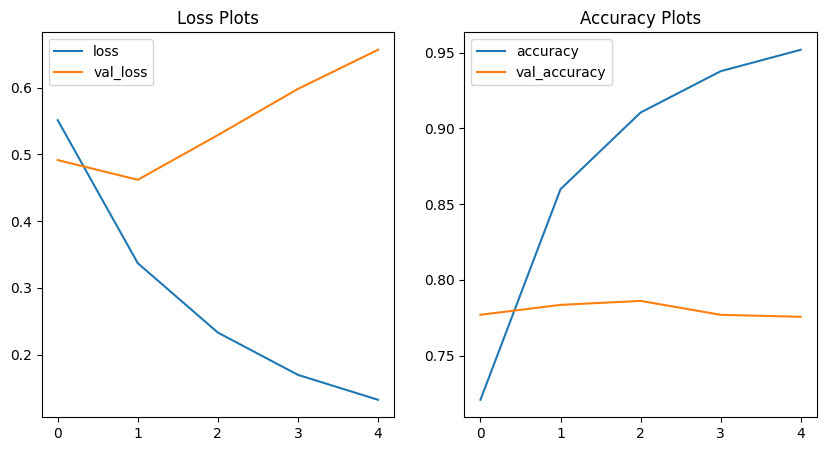

In [50]:
from helper_functions import plot_model_hist
plot_model_hist(model_1_history)

In [112]:
y_pred_probs = model_1.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_1_results  

{'accuracy': 75.98, 'precision': 76.27, 'recall': 75.98, 'f1': 75.69}

### Model 2: LSTM model

In [52]:
# define model 2 using tensorflow API LSTM model
from tensorflow.keras import layers

# create a model using the Sequential API
model_2 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.LSTM(64, return_sequences=True), # return sequences since we are using another LSTM layer
    layers.LSTM(64), # return a single vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_2_LSTM")

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [53]:
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_2_history = model_2.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_2_LSTM")])


Saving TensorBoard log files to:  running_logs/model_2_LSTM/20230719-144524
Epoch 1/5
215/215 [==============================] - 10s 28ms/step - loss: 0.1812 - accuracy: 0.9317 - val_loss: 0.7199 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0949 - accuracy: 0.9654 - val_loss: 0.9025 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0747 - accuracy: 0.9691 - val_loss: 1.0249 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0700 - accuracy: 0.9705 - val_loss: 1.0577 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0607 - accuracy: 0.9731 - val_loss: 1.1885 - val_accuracy: 0.7533


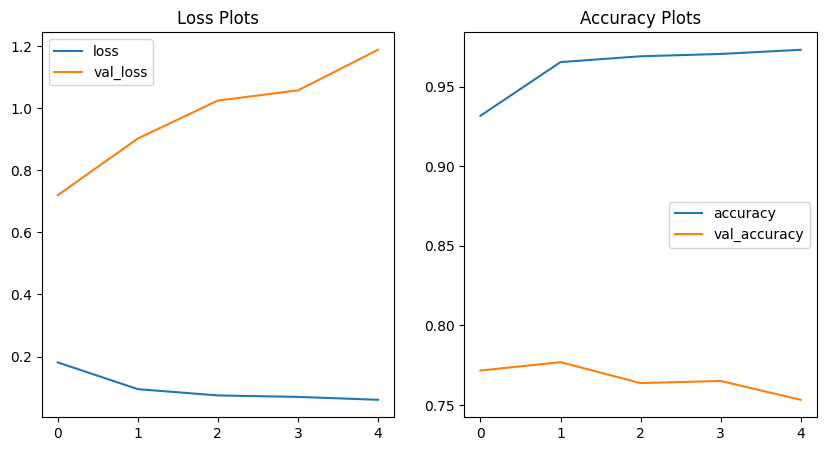

In [54]:
# plot the model history
plot_model_hist(model_2_history)

In [113]:
# make predictions
y_pred_probs = model_2.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds) 
model_2_results                                    

{'accuracy': 75.46, 'precision': 75.41, 'recall': 75.46, 'f1': 75.4}

### Model 3: GRU model

In [56]:
# define model 3 using tensorflow API GRU model
from tensorflow.keras import layers

# create a model using the Sequential API
model_3 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.GRU(64, return_sequences=True), # return sequences since we are using another LSTM layer
    layers.GRU(64), # return a single vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_3_GRU")

model_3.summary()


Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                       

In [57]:
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_3_history = model_3.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_3_GRU")])


Saving TensorBoard log files to:  running_logs/model_3_GRU/20230719-144556
Epoch 1/5
215/215 [==============================] - 9s 27ms/step - loss: 0.1514 - accuracy: 0.9514 - val_loss: 0.6665 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0729 - accuracy: 0.9723 - val_loss: 1.6685 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0584 - accuracy: 0.9747 - val_loss: 1.2971 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0453 - accuracy: 0.9785 - val_loss: 1.4158 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0451 - accuracy: 0.9794 - val_loss: 1.0427 - val_accuracy: 0.7507


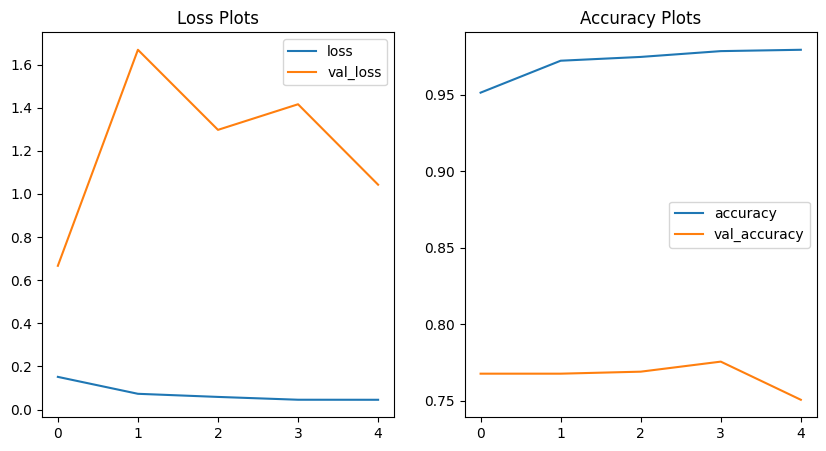

In [58]:
# plot the model history
plot_model_hist(model_3_history)

In [114]:
# make predictions
y_pred_probs = model_3.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_3_results                                    

{'accuracy': 76.77, 'precision': 76.75, 'recall': 76.77, 'f1': 76.68}

### Model 4 : Bi-directional LSTM

In [60]:
# Define model 4 using the tensorflow API Bidirectional LSTM model
from tensorflow.keras import layers

# create a model using the Sequential API
model_4 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)), # return sequences since we are using another LSTM layer
    layers.Bidirectional(layers.LSTM(64)), # return a single vector
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_4_bidirectional_LSTM")

model_4.summary()

Model: "model_4_bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                        

In [61]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_4_history = model_4.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_4_bidirectional_LSTM")])
                

Saving TensorBoard log files to:  running_logs/model_4_bidirectional_LSTM/20230719-144629
Epoch 1/5
215/215 [==============================] - 13s 34ms/step - loss: 0.1014 - accuracy: 0.9634 - val_loss: 0.8578 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0516 - accuracy: 0.9765 - val_loss: 1.4245 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0434 - accuracy: 0.9791 - val_loss: 1.4257 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0436 - accuracy: 0.9787 - val_loss: 1.6361 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0384 - accuracy: 0.9790 - val_loss: 2.2413 - val_accuracy: 0.7598


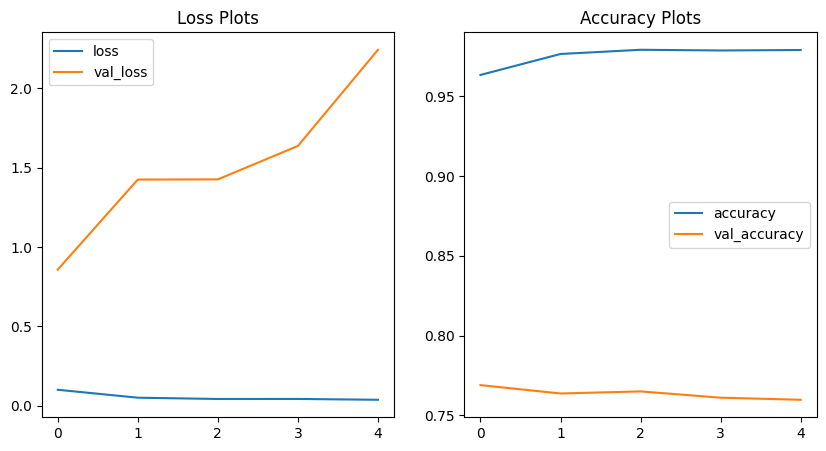

In [62]:
# plot the model history
plot_model_hist(model_4_history)

In [115]:
# make predictions
y_pred_probs = model_4.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_4_results                                    

{'accuracy': 75.59, 'precision': 76.02, 'recall': 75.59, 'f1': 75.21}

### Model 5: 1D Convolutional Neural Network

In [64]:
# Define model 5 using the tensorflow API 1D Conv1D model
from tensorflow.keras import layers

# create a model using the Sequential API
model_5 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string), # input layer
    text_vectorizer, # turn text into numbers
    embedding, # turn numbers into embedding
    layers.Conv1D(64, kernel_size=5, padding="same", activation="relu"), # kernel_size is the number of words to look at
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"), # add a fully connected layer with 64 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_5_Conv1D")

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            41024     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)              

In [65]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_5_history = model_5.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_5_Conv1D")])
                                        

Saving TensorBoard log files to:  running_logs/model_5_Conv1D/20230719-144709
Epoch 1/5
215/215 [==============================] - 3s 10ms/step - loss: 0.1275 - accuracy: 0.9699 - val_loss: 0.9645 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0542 - accuracy: 0.9777 - val_loss: 1.1318 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0448 - accuracy: 0.9790 - val_loss: 1.3533 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0385 - accuracy: 0.9813 - val_loss: 1.6834 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0363 - accuracy: 0.9822 - val_loss: 1.6790 - val_accuracy: 0.7612


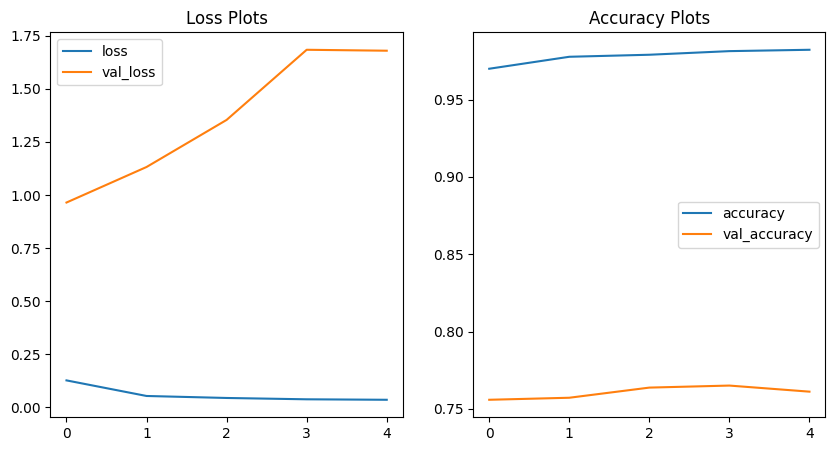

In [66]:
# plot the model history
plot_model_hist(model_5_history)

In [116]:
# make predictions
y_pred_probs = model_5.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_5_results                                    

{'accuracy': 76.12, 'precision': 76.36, 'recall': 76.12, 'f1': 75.84}

### Model 6: TensorFlow Hub Pretrained Feature Extractor

In [90]:
# Define model 6 using the tensorflow hub pretrained feature extractor
import tensorflow_hub as hub
from tensorflow.keras import layers
# define the pretrained embedding layer
embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                          input_shape=[], # define input shape
                            dtype=tf.string, # define data type of input
                            trainable=False, # do not train the layer
                            name="universal_sentence_encoder")

# create a model using the Sequential API
model_6 = tf.keras.Sequential([
    embed, # use the pretrained embedding layer
    layers.Dense(128, activation="relu"), # add a fully connected layer with 256 hidden units
    layers.Dense(1, activation="sigmoid") # add a fully connected layer with 1 hidden unit
], name="model_6_TB_HUB_USE")

model_6.summary()

Model: "model_6_TB_HUB_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [91]:
# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_6_history = model_6.fit(train_sentences,
                                train_labels,
                                epochs=5,
                                validation_data=(val_sentences, val_labels),
                                callbacks=[prepare_tb_call_back("running_logs", "model_6_TB_HUB_USE")])
                                                

Saving TensorBoard log files to:  running_logs/model_6_TB_HUB_USE/20230719-145331
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.4840 - accuracy: 0.7876 - val_loss: 0.4512 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4092 - accuracy: 0.8186 - val_loss: 0.4369 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3950 - accuracy: 0.8248 - val_loss: 0.4313 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3837 - accuracy: 0.8289 - val_loss: 0.4273 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3749 - accuracy: 0.8356 - val_loss: 0.4258 - val_accuracy: 0.8176


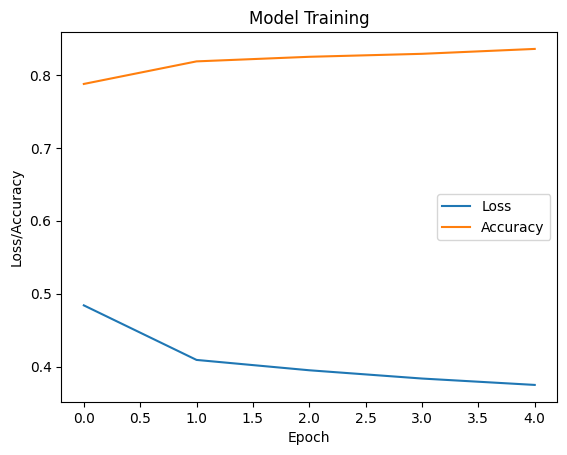

In [92]:
# plot the model history
plot_model_hist(model_6_history)

In [117]:
# make predictions
y_pred_probs = model_6.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=y_preds)
model_6_results                                    

{'accuracy': 81.76, 'precision': 81.99, 'recall': 81.76, 'f1': 81.61}

### Model 7: Same as model 6 with 10% of training data

In [94]:
# clone model 6 as model 7
model_7 = tf.keras.models.clone_model(model_6)
# change the name of the model
model_7._name = "model_7_TB_HUB_USE"

model_7.summary()

Model: "model_7_TB_HUB_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


#### prepare 10% of training data

In [95]:
# create subset of 10% of df_train 
df_train_10_percent = df_train_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)

# split the df_train_10_percent into train and validation sets by using sklearn train_test_split
from sklearn.model_selection import train_test_split
train_sentences_10_percent, val_sentences_10_percent, train_labels_10_percent, val_labels_10_percent = train_test_split(df_train_10_percent["text"].to_numpy(),
                                                                                                                        df_train_10_percent["target"].to_numpy(),
                                                                                                                        test_size=0.1,
                                                                                                                        random_state=42)

# check the number of samples in training and validation sets
len(train_sentences_10_percent), len(train_labels_10_percent), len(val_sentences_10_percent), len(val_labels_10_percent)

(684, 684, 77, 77)

In [96]:
# check the percentage of disaster and non-disaster tweets in training and validation sets
print("percentage of disaster tweets in training set : ", round(len(train_labels_10_percent[train_labels_10_percent == 1]) / len(train_labels_10_percent) * 100, 2), "%")
print("percentage of non-disaster tweets in training set : ", round(len(train_labels_10_percent[train_labels_10_percent == 0]) / len(train_labels_10_percent) * 100, 2), "%")
print("percentage of disaster tweets in validation set : ", round(len(val_labels_10_percent[val_labels_10_percent == 1]) / len(val_labels_10_percent) * 100, 2), "%")
print("percentage of non-disaster tweets in validation set : ", round(len(val_labels_10_percent[val_labels_10_percent == 0]) / len(val_labels_10_percent) * 100, 2), "%")


percentage of disaster tweets in training set :  46.35 %
percentage of non-disaster tweets in training set :  53.65 %
percentage of disaster tweets in validation set :  40.26 %
percentage of non-disaster tweets in validation set :  59.74 %


In [97]:
# check the number of samples in training and validation sets of the original dataframe
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [98]:
# check the percentage of disaster and non-disaster tweets in training and validation sets of the original dataframe
print("percentage of disaster tweets in training set : ", round(len(train_labels[train_labels == 1]) / len(train_labels) * 100, 2), "%")
print("percentage of non-disaster tweets in training set : ", round(len(train_labels[train_labels == 0]) / len(train_labels) * 100, 2), "%")
print("percentage of disaster tweets in validation set : ", round(len(val_labels[val_labels == 1]) / len(val_labels) * 100, 2), "%")
print("percentage of non-disaster tweets in validation set : ", round(len(val_labels[val_labels == 0]) / len(val_labels) * 100, 2), "%")

percentage of disaster tweets in training set :  42.67 %
percentage of non-disaster tweets in training set :  57.33 %
percentage of disaster tweets in validation set :  45.67 %
percentage of non-disaster tweets in validation set :  54.33 %


In [99]:
# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
model_7_history = model_7.fit(train_sentences_10_percent,
                                train_labels_10_percent,
                                epochs=5,
                                validation_data=(val_sentences_10_percent, val_labels_10_percent),
                                callbacks=[prepare_tb_call_back("running_logs", "model_7_TB_HUB_USE_10_PERCENT")])
                                                

Saving TensorBoard log files to:  running_logs/model_7_TB_HUB_USE_10_PERCENT/20230719-145406
Epoch 1/5
22/22 [==============================] - 3s 28ms/step - loss: 0.6679 - accuracy: 0.6813 - val_loss: 0.6301 - val_accuracy: 0.7532
Epoch 2/5
22/22 [==============================] - 0s 8ms/step - loss: 0.5851 - accuracy: 0.7997 - val_loss: 0.5505 - val_accuracy: 0.7532
Epoch 3/5
22/22 [==============================] - 0s 8ms/step - loss: 0.4999 - accuracy: 0.8143 - val_loss: 0.4927 - val_accuracy: 0.7662
Epoch 4/5
22/22 [==============================] - 0s 8ms/step - loss: 0.4399 - accuracy: 0.8143 - val_loss: 0.4666 - val_accuracy: 0.7662
Epoch 5/5
22/22 [==============================] - 0s 8ms/step - loss: 0.4028 - accuracy: 0.8275 - val_loss: 0.4505 - val_accuracy: 0.7922


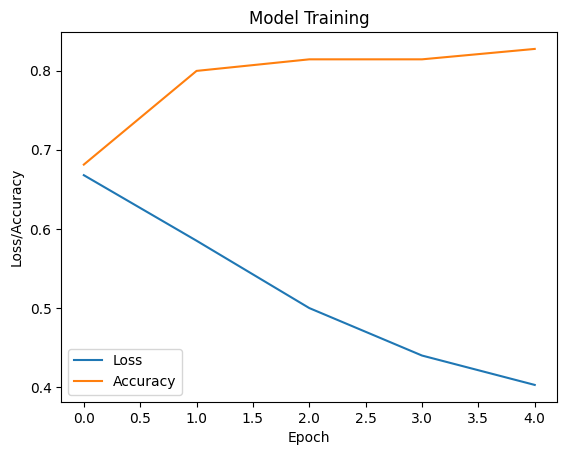

In [100]:
# plot the model history
plot_model_hist(model_7_history)

In [118]:
# make predictions
y_pred_probs = model_7.predict(val_sentences_10_percent)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# calculate model results
model_7_results = calculate_results(y_true=val_labels_10_percent,
                                    y_pred=y_preds)
model_7_results                                    

{'accuracy': 79.22, 'precision': 80.56, 'recall': 79.22, 'f1': 79.41}

# All model Results

In [201]:
# A dataframe with results of all models
import pandas as pd
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                    "model_1_dense": model_1_results,
                                    "model_2_LSTM": model_2_results,
                                    "model_3_GRU": model_3_results,
                                    "model_4_bidirectional_LSTM": model_4_results,
                                    "model_5_Conv1D": model_5_results,
                                    "model_6_TB_HUB": model_6_results,
                                    "model_7_TB_HUB_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.27,81.11,79.27,78.62
model_1_dense,75.98,76.27,75.98,75.69
model_2_LSTM,75.46,75.41,75.46,75.40
model_3_GRU,76.77,76.75,76.77,76.68
model_4_bidirectional_LSTM,75.59,76.02,75.59,75.21
model_5_Conv1D,76.12,76.36,76.12,75.84
model_6_TB_HUB,81.76,81.99,81.76,81.61
model_7_TB_HUB_10_percent,79.22,80.56,79.22,79.41


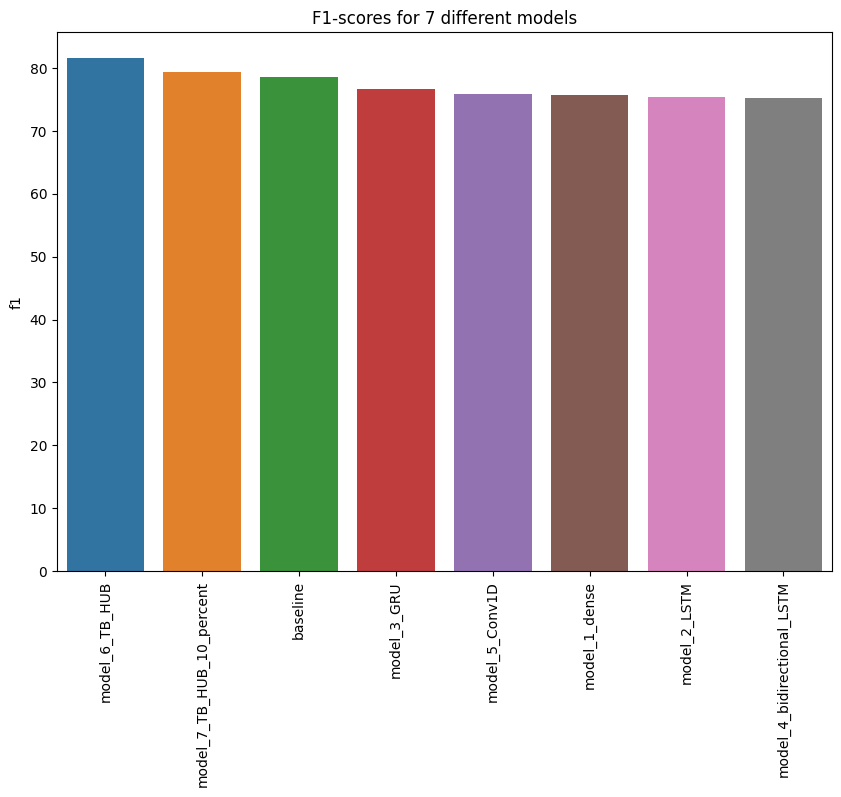

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

all_model_results_sorted = all_model_results.sort_values(by="f1", ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x=all_model_results_sorted.index, y="f1", data=all_model_results_sorted)
plt.xticks(rotation=90)
plt.title("F1-scores for 7 different models")
plt.show()

## Save the Best Model

In [141]:
# save the model_6 to disk as hdf5 format
model_6.save("./saved_models/model_6_TB_HUB_USE.h5")

## Load the saved model

In [142]:
# load the model from disk
loaded_model_6 = tf.keras.models.load_model("./saved_models/model_6_TB_HUB_USE.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer}
                                            )

# evaluate the loaded model on the test set
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4258 - accuracy: 0.8176


[0.4257521331310272, 0.817585289478302]

In [143]:
model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 8ms/step - loss: 0.4258 - accuracy: 0.8176


[0.4257521331310272, 0.817585289478302]

# Investingating Wrong predictions from validation dataset

## Wrong predictions

* 0 = not diaster
* 1 = diaster

In [186]:
# investigate the model_6 wrong predictions on validation set
y_pred_probs = model_6.predict(val_sentences)
y_preds = tf.squeeze(tf.round(y_pred_probs))

# convert y_preds as integers
y_preds = y_preds.numpy().astype(int)

# get the y_pred_probs as numpy array
y_pred_probs = tf.squeeze(y_pred_probs).numpy()

#  round to 2 decimal places
y_pred_probs = np.round(y_pred_probs, 2)

# create a dataframe with validation sentences, validation labels and predictions
val_df = pd.DataFrame({"text": val_sentences,
                        "Groud Truth": val_labels,
                        "Predicted Label": y_preds,
                        "Predicted Probabilities": y_pred_probs,
                        })



# See full text of a tweet in the dataframe
pd.options.display.max_colwidth = 500

# see all rows of the dataframe
pd.options.display.max_rows = None


### False Positives

In [187]:
# find the false positives
val_df[(val_df["Groud Truth"] == 0) & (val_df["Predicted Label"] == 1)]

,text,Groud Truth,Predicted Label,Predicted Probabilities
1,FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday,0,1,0.75
10,@RedCoatJackpot *As it was typical for them their bullets collided and none managed to reach their targets; such was the ''curse'' of a --,0,1,0.63
11,The Five Fatal Flaws in the Iran Deal https://t.co/ztfEAd8GId via @YouTube,0,1,0.53
17,there's this person &amp; they reckon when you're dying your brain floods with dmt causing you to relive your life in real time in a simulation,0,1,0.55
31,? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying,0,1,0.92
43,Russian #ushanka #winter #military fur hat (xl61-62) with soviet badge LINK:\nhttp://t.co/74YFQxvAK0 http://t.co/KXrEHVt6hL,0,1,0.53
48,Cyclists it is pandemonium on the roads today. Drive carefully!,0,1,0.66
49,@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods,0,1,0.87
80,GENERAL AUDIENCE: On Wounded Families | ZENIT - The World Seen From Rome http://t.co/hFvnyfT78C,0,1,0.68
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY,0,1,0.85


### False Negatives

In [188]:
# find the false negatives
val_df[(val_df["Groud Truth"] == 1) & (val_df["Predicted Label"] == 0)]

,text,Groud Truth,Predicted Label,Predicted Probabilities
3,@camilacabello97 Internally and externally screaming,1,0,0.20
18,Policyholders object to Clico rescue plan http://t.co/E4DvI9vUXZ http://t.co/JyCpf8iYhg,1,0,0.34
21,So I pick myself off the ground and swam before I drowned. Hit the bottom so hard I bounced twice suffice this time around is different.,1,0,0.12
22,US wont upgrade its infrastructure? http://t.co/NGEHhG9YGa' it a bad situation and its going to get ugly very quickly #USA #sustainability,1,0,0.44
23,Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube,1,0,0.03
30,Medieval airplane hijacker testa: earnings the distinction divers: HtaRvrGLY,1,0,0.48
38,Why are you deluged with low self-image? Take the quiz: http://t.co/XsPqdOrIqj http://t.co/CQYvFR4UCy,1,0,0.03
40,@BoyInAHorsemask its a panda trapped in a dogs body,1,0,0.10
42,Nearly had a heart attack just now; loud bang against window next to meÛ_turns out it was two birds flying into the glass.,1,0,0.44
58,Leitchfield KY:\n\n Bella Edward &amp; Rosalie need rescue/adoption/local foster home(s)/sponsorships.\n\n Trapped &amp;... http://t.co/Ajay0sNPlg,1,0,0.14


## Correct Predictions

In [189]:
# first 10 of the correct predictions
val_df[(val_df["Groud Truth"] == val_df["Predicted Label"])][:10]

,text,Groud Truth,Predicted Label,Predicted Probabilities
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5,0,0,0.21
2,Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj,1,1,0.99
4,Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov,1,1,0.69
5,Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8,1,1,0.75
6,How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd,1,1,0.98
7,Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by SÛ_ http://t.co/JDVSGVhlIs,1,1,0.98
8,Ûª93 blasts accused Yeda Yakub dies in Karachi of heart attack http://t.co/mfKqyxd8XG #Mumbai,1,1,0.96
9,My ears are bleeding https://t.co/k5KnNwugwT,0,0,0.12
12,Isai 60:1; Psm 138:8\n Every conspiracy against my lifting be scattered unto desolation in the name o f Jesus.,0,0,0.18
13,k_matako_bot: Breaking news! Unconfirmed! I just heard a loud bang nearby. in what appears to be a blast of wind from my neighbour's ass.,0,0,0.41


# Time taken to responde

In [206]:
# create a funciton to caluclate time per prediction
import time
def pred_timer(model, samples):
    """
    Times how long a model takes to make predictions on samples.
    """
    start_time = time.perf_counter() # get start time
    model.predict(samples) # make predictions
    end_time = time.perf_counter() # get finish time
    total_time = end_time - start_time # calculate how long predictions took to make
    time_per_pred = total_time / len(val_sentences) # find prediction time per sample
    return total_time

# calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time = pred_timer(model_6, val_sentences)
model_6_total_pred_time


0.1778560180000568

In [210]:
# calculate model_0, model_1, model_2, model_3, model_4, model_5, model_7 time per pred and add a new column to all_model_results dataframe
all_model_results["total prediction time"] = [pred_timer(model_0, val_sentences),
                                                pred_timer(model_1, val_sentences),
                                                pred_timer(model_2, val_sentences),
                                                pred_timer(model_3, val_sentences),
                                                pred_timer(model_4, val_sentences),
                                                pred_timer(model_5, val_sentences),
                                                pred_timer(model_6, val_sentences),
                                                pred_timer(model_7, val_sentences)]

# sort the dataframe by total prediction time
all_model_results_time_sorted = all_model_results.sort_values(by="total prediction time")
all_model_results_time_sorted

,accuracy,precision,recall,f1,total prediction time
baseline,79.27,81.11,79.27,78.62,0.020755
model_5_Conv1D,76.12,76.36,76.12,75.84,0.094225
model_1_dense,75.98,76.27,75.98,75.69,0.110272
model_3_GRU,76.77,76.75,76.77,76.68,0.123438
model_4_bidirectional_LSTM,75.59,76.02,75.59,75.21,0.148031
model_7_TB_HUB_10_percent,79.22,80.56,79.22,79.41,0.152045
model_2_LSTM,75.46,75.41,75.46,75.40,0.158084
model_6_TB_HUB,81.76,81.99,81.76,81.61,0.176718


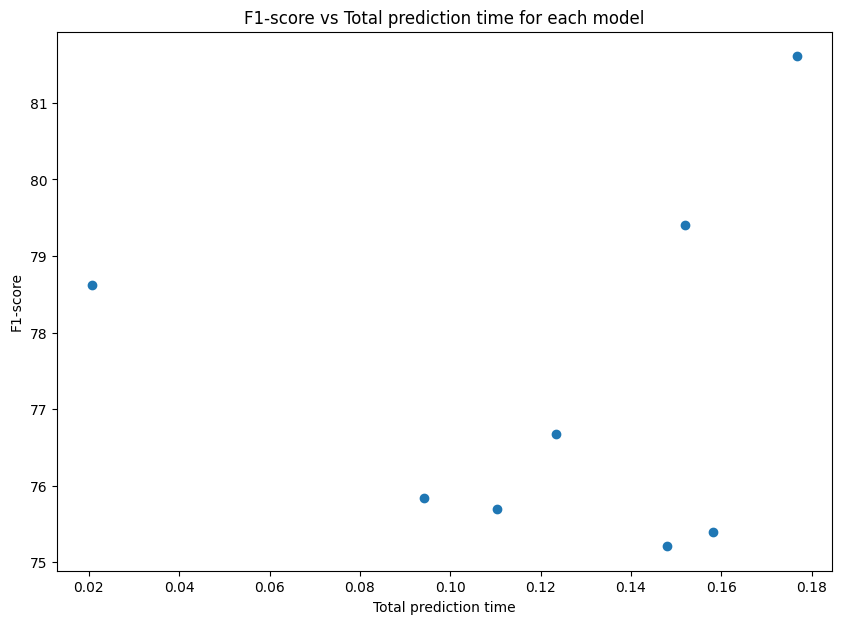

In [212]:
# plot a scatter plot of model prediction times versus f1-score
plt.figure(figsize=(10, 7))
plt.scatter(all_model_results_time_sorted["total prediction time"], all_model_results_time_sorted["f1"])
plt.xlabel("Total prediction time")
plt.ylabel("F1-score")
plt.title("F1-score vs Total prediction time for each model")
plt.show()

# Make submission

In [213]:
# get predicitons of test sentences
test_sentences = df_test["text"].to_numpy()
test_sentences[:10]

array(['Just happened a terrible car crash',
       'Heard about #earthquake is different cities, stay safe everyone.',
       'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       'Apocalypse lighting. #Spokane #wildfires',
       'Typhoon Soudelor kills 28 in China and Taiwan',
       "We're shaking...It's an earthquake",
       "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
       'Hey! How are you?', 'What a nice hat?', 'Fuck off!'], dtype=object)

In [218]:
# make predictions on test sentences using model_6
test_pred_probs = model_6.predict(test_sentences)
test_preds = tf.squeeze(tf.round(test_pred_probs))

# convert test_preds to integers
test_preds = test_preds.numpy().astype(int)
test_preds[:10]


array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [224]:
submission = pd.DataFrame({
    "id": df_test["id"],
    "target": test_preds
})

submission.to_csv('submission.csv', index=False, header=True)